- ref. https://www.kaggle.com/apapiu/regularized-linear-models
- ref. https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [67]:
# load data
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
pd.set_option("display.width", 100)
pd.set_option("display.max_rows", 100)

train_df = pd.read_csv("./train.csv", header=0)
test_df = pd.read_csv("./test.csv", header=0)
train_id = train_df["Id"]
train_y = train_df["SalePrice"]
test_id = test_df["Id"]
all_df = pd.concat((train_df.loc[:,'MSSubClass':'SaleCondition'], test_df.loc[:,'MSSubClass':'SaleCondition']))
dfd = {'train': train_df, 'test': test_df}
for name,df in dfd.items():
    print(name)
    print(df.columns.values)

train
['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' '

In [68]:
# check data
for name,df in dfd.items():
    print(name)
    print(df.head(3))

train
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub   
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub   
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub   

     ...     PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  \
0    ...            0    NaN   NaN         NaN       0      2   2008        WD         Normal   
1    ...            0    NaN   NaN         NaN       0      5   2007        WD         Normal   
2    ...            0    NaN   NaN         NaN       0      9   2008        WD         Normal   

   SalePrice  
0     208500  
1     181500  
2     223500  

[3 rows x 81 columns]
test
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0  1461          20       RH      

In [69]:
# check data
for name,df in dfd.items():
    print(name)
    print(df.info())

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460

In [70]:
# check data
for name,df in dfd.items():
    print(name)
    print(df.describe(include='all').T)

train


              count unique      top  freq       mean       std    min     25%     50%      75%  \
Id             1460    NaN      NaN   NaN      730.5    421.61      1  365.75   730.5  1095.25   
MSSubClass     1460    NaN      NaN   NaN    56.8973   42.3006     20      20      50       70   
MSZoning       1460      5       RL  1151        NaN       NaN    NaN     NaN     NaN      NaN   
LotFrontage    1201    NaN      NaN   NaN      70.05   24.2848     21      59      69       80   
LotArea        1460    NaN      NaN   NaN    10516.8   9981.26   1300  7553.5  9478.5  11601.5   
Street         1460      2     Pave  1454        NaN       NaN    NaN     NaN     NaN      NaN   
Alley            91      2     Grvl    50        NaN       NaN    NaN     NaN     NaN      NaN   
LotShape       1460      4      Reg   925        NaN       NaN    NaN     NaN     NaN      NaN   
LandContour    1460      4      Lvl  1311        NaN       NaN    NaN     NaN     NaN      NaN   
Utilities      1460 

              count unique      top  freq       mean       std   min     25%    50%      75%  \
Id             1459    NaN      NaN   NaN       2190   421.321  1461  1825.5   2190   2554.5   
MSSubClass     1459    NaN      NaN   NaN    57.3783   42.7469    20      20     50       70   
MSZoning       1455      5       RL  1114        NaN       NaN   NaN     NaN    NaN      NaN   
LotFrontage    1232    NaN      NaN   NaN    68.5804   22.3768    21      58     67       80   
LotArea        1459    NaN      NaN   NaN    9819.16   4955.52  1470    7391   9399  11517.5   
Street         1459      2     Pave  1453        NaN       NaN   NaN     NaN    NaN      NaN   
Alley           107      2     Grvl    70        NaN       NaN   NaN     NaN    NaN      NaN   
LotShape       1459      4      Reg   934        NaN       NaN   NaN     NaN    NaN      NaN   
LandContour    1459      4      Lvl  1311        NaN       NaN   NaN     NaN    NaN      NaN   
Utilities      1457      1   AllPub  145

In [71]:
# check datatype
int_cols = all_df.select_dtypes(['int64']).columns.values
## ref.
## int_cols = list(set(train_df.select_dtypes(['int64']).columns.values).union(set(test_df.select_dtypes(['int64']).columns.values)))
print(int_cols)

['MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces'
 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch'
 'PoolArea' 'MiscVal' 'MoSold' 'YrSold']


In [72]:
# check datatype
object_cols = all_df.select_dtypes(['object']).columns.values
## ref.
## object_cols = list(set(train_df.select_dtypes(['object']).columns.values).union(set(test_df.select_dtypes(['object']).columns.values)))
print(object_cols)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


In [73]:
# check datatype
float_cols = all_df.select_dtypes(['float64']).columns.values
## ref.
## float_cols = list(set(train_df.select_dtypes(['float64']).columns.values).union(set(test_df.select_dtypes(['float64']).columns.values)))
print(float_cols)

['LotFrontage' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'BsmtFullBath' 'BsmtHalfBath' 'GarageYrBlt' 'GarageCars'
 'GarageArea']


In [74]:
# check datatype
print(all_df.select_dtypes(exclude=['int64', 'object', 'float64']).columns.values)
## ref.
## print(train_df.select_dtypes(exclude=['int64', 'object', 'float64']).columns.values)
## print(test_df.select_dtypes(exclude=['int64', 'object', 'float64']).columns.values)

[]


In [75]:
# check null
for name,df in dfd.items():
    print(name)
    isnull_ratio = df.isnull().sum()/df.isnull().count()
    print(isnull_ratio[isnull_ratio != 0].sort_values(ascending=False))

train
PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64
test
PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageCond      0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtQual        0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtFullBath    0.001371

In [76]:
# drop data with too many nulls
all_df = all_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1)
int_cols = all_df.select_dtypes(['int64']).columns.values
object_cols = all_df.select_dtypes(['object']).columns.values
float_cols = all_df.select_dtypes(['float64']).columns.values

# complete data
for col in int_cols.tolist() + float_cols.tolist():
    all_df[col] = all_df[col].fillna(all_df[col].mean())
for col in object_cols:
    all_df[col] = all_df[col].fillna(all_df[col].mode()[0])

isnull_sum = all_df.isnull().sum()
print(isnull_sum[isnull_sum != 0])

Series([], dtype: int64)


In [77]:
# check correlation (takes time and requires LabelEncoder)

# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# for col in object_cols:
#     all_df[col] = le.fit_transform(all_df[col])
## ref.
## for (name,df_org),(_name,df_obj) in zip(dfd.items(), object_dfd.items()):
##     for col in df_obj:
##         mapping = dict((v, k) for k,v in enumerate(df_obj[col].unique()))
##         df_org[col] = df_org[col].map(mapping).astype(int)

# train_x = all_df[:train_df.shape[0]]
# for col in train_x:
#     sns.jointplot(train_x[col], train_y)
#     plt.savefig("images/{}.png".format(col))
# plt.show()

In [78]:
# check correlation (takes time and requires LabelEncoder)
# plt.figure(figsize=(12, 8))
# sns.heatmap(train_x.astype(float).corr(), cmap=plt.cm.viridis, annot=False)
# plt.savefig("images/heat_all.png".format(col))
# plt.show()

In [79]:
# check correlation (takes time)
# concat_df = pd.concat((train_x, train_y), axis=1)
# col_labels = ['Area', 'Type', 'Qual', 'Cond', 'SF']
# col_list = []
# for label in col_labels:
#     cols = [col for col in train_df.columns if label in col]
#     cols.append('SalePrice')
#     col_list.append(cols)
# df_list = []
# tmp_df = concat_df
# for cols in col_list:
#     df_list.append(concat_df[cols])
#     tmp_df = tmp_df.drop(cols, axis=1, errors='ignore')
# df_list.append(tmp_df)
# for df in df_list:
#     sns.heatmap(df.astype(float).corr(), cmap=plt.cm.viridis, annot=False)
#     plt.show()

In [80]:
# change categorical values to dummy variable(vector)
# get_dummies is better than LabelEncoder for learning
all_df = pd.get_dummies(all_df)
print(all_df.head())

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60         65.0     8450            7            5       2003          2003   
1          20         80.0     9600            6            8       1976          1976   
2          60         68.0    11250            7            5       2001          2002   
3          70         60.0     9550            7            5       1915          1970   
4          60         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            SaleType_ConLw  SaleType_New  \
0       196.0       706.0         0.0          ...                         0             0   
1         0.0       978.0         0.0          ...                         0             0   
2       162.0       486.0         0.0          ...                         0             0   
3         0.0       216.0         0.0          ...                         0       

In [81]:
# check correlation
train_x = all_df[:train_df.shape[0]]
concat_df = pd.concat((train_x, train_y), axis=1)
print(concat_df.astype(float).corr()['SalePrice'].sort_values(ascending=False))

SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
BsmtQual_Ex              0.553105
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
MasVnrArea               0.475210
GarageYrBlt              0.471062
Fireplaces               0.466929
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleType_New             0.357509
SaleCondition_Partial    0.352060
LotFrontage              0.334820
MasVnrType_Stone         0.330476
Neighborhood_NoRidge     0.330424
WoodDeckSF    

In [82]:
# remove outlier
outlier_index = train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index
train_x = all_df[:train_x.shape[0]]
test_x = all_df[train_x.shape[0]:]
train_x = train_x.drop(outlier_index)
train_id = train_id.drop(outlier_index)
train_y = train_y.drop(outlier_index)
all_df = pd.concat((train_x, test_x))

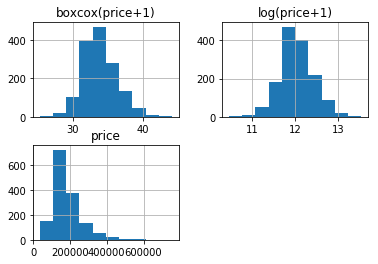

TypeError: tuple indices must be integers or slices, not float

In [83]:
# check skewness
from scipy.stats import skew
from scipy.special import boxcox1p
price_log1p = np.log1p(train_y)
lmbda = 0.15
price_boxcox1p = boxcox1p(train_y, lmbda)
prices = pd.DataFrame({'price': train_y, 'log(price+1)': price_log1p, 'boxcox(price+1)': price_boxcox1p})
prices.hist()
plt.show()
print('price: {}, log(price+1): {}, boxcox(price+1): {}'.format(skew(train_y), skew(price_log1p, skew(price_boxcox1p))))
train_y = price_boxcox1p

numerical_df = all_df[int_cols.tolist()+float_cols.tolist()]
skewness = numerical_df.apply(lambda x: skew(x.dropna()))
print(skewness)

In [ ]:
# fix skewness
skewed_features = skewness[skewness > 0.75].index.values.tolist()
#all_df[skewed_features] = np.log1p(all_df[skewed_features])
all_df[skewed_features] = boxcox1p(all_df[skewed_features], 0.15)

numerical_df = all_df[int_cols.tolist()+float_cols.tolist()]
skewness = numerical_df.apply(lambda x: skew(x.dropna()))
print(skewness)

In [ ]:
# normalize (became worse)
# from sklearn.preprocessing import MinMaxScaler
# ms = MinMaxScaler()
# all_df[int_cols.tolist()+float_cols.tolist()] = ms.fit_transform(all_df[int_cols.tolist()+float_cols.tolist()])
## ref.
## all_df[int_cols.tolist()+float_cols.tolist()] = all_df[int_cols.tolist()+float_cols.tolist()].apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)

In [ ]:
# feature engineering (became worse)
# all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']
# all_df = all_df.drop(['TotalBsmtSF'], axis=1)
# all_df = all_df.drop(['1stFlrSF'], axis=1)
# all_df = all_df.drop(['2ndFlrSF'], axis=1)

In [ ]:
# check band (takes time)
# train_x = all_df[:train_df.shape[0]]
# concat_df = pd.concat((train_x, train_y), axis=1)
# for col in np.delete(concat_df.columns.values, -1):
#     concat_df[col] = pd.qcut(concat_df[col], 5, duplicates='drop')
#     print(concat_df[[col, 'SalePrice']].groupby([col], as_index=False).mean().sort_values(by=col, ascending=True))

In [ ]:
# apply banding (became worse)
# band_dict = {
#     # 'GrLivArea': [-1, 1066.6, 1339.0, 1578.0, 1869.0, 9999999999],
#     # 'GarageArea': [-1, 295.6, 440.0, 516.0, 620.2, 9999999999],
#     # 'TotalBsmtSF': [-1, 756, 910, 1088, 1391, 9999999999],
#     # '1stFlrSF': [-1, 848.0, 1000.2, 1182.0, 1482.4, 9999999999],
#     # 'LotArea': [-1, 7078, 8793, 10198, 12205, 9999999999],
#     # 'BsmtUnfSF': [-1, 172.0, 374.6, 604.4, 896.0, 9999999999],
#     # 'BsmtFinSF1': [-1, 218.6, 525.6, 806.4, 9999999999],
#     # '2ndFlrSF': [-1, 455.4, 672.0, 796.2, 954.2, 9999999999],
#     # 'OpenPorchSF': [-1, 25.0, 40.0, 57.0, 83.2, 130.0, 9999999999],
#     # 'MSSubClass': [-1, 30.0, 60.0, 80.0, 9999999999],
#     # 'BsmtUnfSF': [-1, 172.0, 374.6, 604.4, 896.0, 9999999999],
#     # 'MasVnrArea': [-1, 25.2, 116.0, 205.2, 335.0, 9999999999],
#     'LotFrontage': [-1, 59.0, 68.0, 70.05, 80.0, 9999999999],
#     }
# for col,band in band_dict.items():
#     for i in range(len(band)-1):
#         all_df.loc[(all_df[col] > band[i]) & (all_df[col] <= band[i+1]), col] = i
#     print(col, all_df[col].head(3))

In [ ]:
# prepare for learning, prediction and validation
train_x = all_df[:train_x.shape[0]]
test_x = all_df[train_x.shape[0]:]
print(train_x.head())
print(test_x.head())

In [ ]:
# grid search on ridge parameter
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

tuned_parameters = [{'alpha': [0.01, 0.1, 0.1, 1, 10, 100, 1000]}]
ridge = Ridge(max_iter=10**5)
clf = GridSearchCV(ridge, tuned_parameters, cv=5, scoring='neg_mean_squared_error')
clf.fit(train_x, train_y)
print(clf.best_score_, clf.best_params_)
results = clf.cv_results_
for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print("{:0.3f} (+/-{:0.03f} for {}".format(mean, std, params))

In [ ]:
# grid search on xgboost
import xgboost as xgb
dtrain = xgb.DMatrix(train_x, label=train_y)
dtest = xgb.DMatrix(test_x)
params = {"max_depth": 2, "eta": 0.1}
xgb_model = xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)
xgb_model.loc[30:, ["test-rmse_mean", "train-rmse-mean"]].plot()
plt.show()

In [ ]:
# cross validation
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, LassoLarsIC   # , LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import lightgbm as lgb
#from sklearn.svm import LinearSVR, SVR
from sklearn.model_selection import KFold, cross_validate

svr_params = {
    'kernel' : 'rbf',
    'C' : 1,
    'gamma' : 0.1
}

models = []
lr_model = LinearRegression()
models.append(('linear_regression', lr_model))
ridge_model = Ridge(max_iter=10**5, alpha=10)
models.append(('ridge', ridge_model))
lasso_model = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1, max_iter=10**5))
models.append(('lasso', lasso_model))
elasticnet_model = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3, max_iter=10**5))
models.append(('elasticnet', elasticnet_model))
kr_model = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
models.append(('kernel_ridge', kr_model))
gb_model = GradientBoostingRegressor(n_estimators=3600, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5)
models.append(('gradient_boost', gb_model))
# models.append(('lasso', LassoCV(max_iter=10**5, alphas=[0.01, 0.1, 0.1, 1, 10, 100, 1000])))
# models.append(('elasticnet', ElasticNetCV(max_iter=10**5, alphas=[0.01, 0.1, 0.1, 1, 10, 100, 1000])))
#models.append(('linear svr', LinearSVR()))
#models.append(('svr', SVR(**svr_params)))
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200, reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213, silent=1)
models.append(('xgboost', xgb_model))
lgb_model = lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.05, n_estimators=720, max_bin=55, bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.2319, feature_fraction_seed=9, bagging_seed=9, min_data_in_leaf=6, min_sum_hessian_in_leaf=11)
models.append(('lightgbm', lgb_model))
k_fold = KFold(n_splits=3)
results = {'model': [], 'test_mean': [], 'test_std': [], 'train_mean': [], 'train_std': []}
for name,model in models:
    scores = cross_validate(model, train_x, train_y, cv=k_fold, scoring='neg_mean_squared_error')
    results['model'].append(name)
    results['test_mean'].append(np.mean(scores['test_score']))
    results['test_std'].append(np.std(scores['test_score']))
    results['train_mean'].append(np.mean(scores['train_score']))
    results['train_std'].append(np.std(scores['train_score']))
print(pd.DataFrame(results).sort_values(by='test_mean', ascending=False))

In [ ]:
# learn and predict
from scipy.special import inv_boxcox1p
results = {}
for name,model in models:
    model.fit(train_x, train_y)
    #output = np.expm1(model.predict(test_x))
    output = inv_boxcox1p(model.predict(test_x), 0.15)
    results[name] = output
    submit = pd.DataFrame(data={'Id':test_id, 'SalePrice':output})
    #submit.loc[submit['SalePrice'] < 0, 'SalePrice'] = 0
    submit.to_csv('{}_submit.csv'.format(name), index=False)
    print(name)
    print(submit['SalePrice'].describe())
    submit['SalePrice'].hist(bins=30)
    plt.show()

In [ ]:
# averaging
elasticnet_train_y = elasticnet_model.predict(train_x)
lightgbm_train_y = lgb_model.predict(train_x)
output = 0.7*elasticnet_train_y + 0.3*lightgbm_train_y
print(((output - train_y)**2).mean())

predictions = pd.DataFrame({'elasticnet': results['elasticnet'], 'lightgbm': results['lightgbm']})
predictions.plot(x='elasticnet', y='lightgbm', kind='scatter')
plt.show()

output = 0.7*results['elasticnet'] + 0.3*results['lightgbm']
submit = pd.DataFrame(data={'Id':test_id, 'SalePrice':output})
submit.to_csv('lightgbm_elasticnet_submit.csv'.format(name), index=False)

In [ ]:
# stacking
base_models = [clone(elasticnet_model), clone(lgb_model), clone(kr_model)]
meta_model = clone(xgb_model)
kfold = KFold(n_splits=len(base_models), shuffle=True, random_state=156)
out_of_fold_predictions = np.zeros((train_y.shape[0], len(base_models)))
X, y = train_x.values, train_y.values
for i,model in enumerate(base_models):
    for train_index,holdout_index in kfold.split(X, y):
        model.fit(X[train_index], y[train_index])
        out_of_fold_predictions[holdout_index, i] = model.predict(X[holdout_index])
meta_model.fit(out_of_fold_predictions, y)

out_of_fold_predictions = np.zeros((train_y.shape[0], len(base_models)))
for i,model in enumerate(base_models):
    out_of_fold_predictions[:, i] = model.predict(train_x)
output = meta_model.predict(out_of_fold_predictions)
print(((output - train_y)**2).mean())

out_of_fold_predictions = np.zeros((test_x.shape[0], len(base_models)))
for i,model in enumerate(base_models):
    out_of_fold_predictions[:, i] = model.predict(test_x)
#output = np.expm1(meta_model.predict(out_of_fold_predictions))
output = inv_boxcox1p(meta_model.predict(out_of_fold_predictions), 0.15)
submit = pd.DataFrame(data={'Id':test_id, 'SalePrice':output})
submit.to_csv('stacking_submit.csv'.format(name), index=False)

In [ ]:
# check the result of ridge regression
# check feature importance
coef = pd.Series(ridge_model.coef_, index = train_x.columns).sort_values(ascending=False)
print(coef)
# draw residuals
train_preds = ridge_model.predict(train_x)
residuals = pd.DataFrame({"preds": train_preds, "residuals": train_y-train_preds})
residuals.plot(x='preds', y='residuals', kind='scatter')
plt.show()

In [ ]:
# try neural network (not a scikit-learn estimator, takes time)
# from keras.layers import Dense
# from keras.models import Sequential
# from keras.regularizers import l1
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# X_train = StandardScaler().fit_transform(train_x)
# X_tr, X_val, y_tr, y_val = train_test_split(X_train, train_y, random_state=3)
# nn_model = Sequential()
# nn_model.add(Dense(1, input_dim=X_train.shape[1], W_regularizer=l1(0.001)))
# nn_model.compile(loss='mse', optimizer='adam')
# print(nn_model.summary())
# hist = nn_model.fit(X_tr, y_tr, validation_data = (X_val, y_val))
# print(hist)
# output = pd.Series(np.expm1(nn_model.predict(X_val)[:,0]))
# submit = pd.DataFrame(data={'Id':test_id, 'SalePrice':output})
# submit.to_csv('nn_submit.csv'.format(name), index=False)
# output.hist(bins=30)
# plt.show()

In [ ]:
!head ridge_submit.csv